In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d
from matplotlib.text import Annotation
from matplotlib.patches import FancyArrowPatch
import numpy as np

In [3]:
class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)


def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)

In [4]:
class Arrow3D(FancyArrowPatch):

    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj3d.proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)
        
    def do_3d_projection(self, renderer=None):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj3d.proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))

        return np.min(zs)


def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)

setattr(Axes3D, 'arrow3D', _arrow3D)

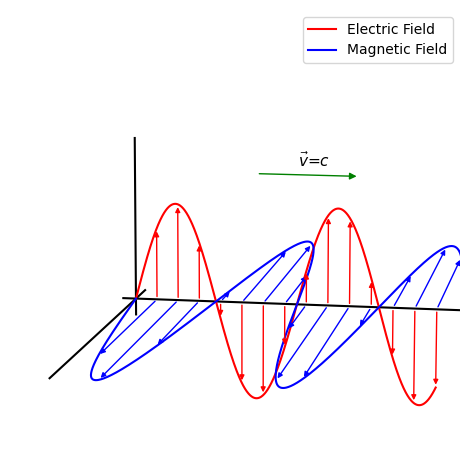

In [10]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Set the limits of the plot
ax.set_xlim([-0, 10])
ax.set_ylim([-0.6, 0.0])
ax.set_zlim([-0, 1.2])

# Draw the X, Y, and Z axes
# X
ax.plot([-0.5, 13], [0, 0], [0, 0], "k")
# Y
ax.plot([0, 0], [-0.8, 0.1], [0, 0], "k")
# Z
ax.plot([0, 0], [0, 0], [-0.1, 1.0], "k")

x = np.linspace(0, 3.7*np.pi, 1000)
B = -0.8*np.sin(x)
E = 0.6*np.sin(x)

ax.set_axis_off()

ax.plot(x, E, 'r', zs=0, zdir='y', label='Electric Field')
ax.plot(x, B, 'b', zs=0, zdir='z', label='Magnetic Field')

xs = np.linspace(0, 3.7*np.pi, 15)
for i in xs:
    b = -0.8*np.sin(i)
    ax.arrow3D(i, 0, 0, 
               0, b, 0, 
               mutation_scale=7, 
               arrowstyle="-|>", 
               ec='b', 
               fc='b')
    e = 0.6*np.sin(i)
    ax.arrow3D(i, 0, 0, 
               0, 0, e, 
               mutation_scale=7, 
               arrowstyle="-|>", 
               ec='r', 
               fc='r')

ax.text(2*np.pi, 0, 0.85, r"$\vec{v}$=$c$", c='k', fontsize=11)
ax.arrow3D(1.5*np.pi, 0, 0.8, 
           1.25*np.pi, 0, 0,
           mutation_scale=10, 
           arrowstyle="-|>", 
           ec='g', 
           fc='g')

ax.legend()
ax.view_init(elev=10, azim=280)
plt.tight_layout()

# Show the plot
plt.show()

# uncomment this line to save the plot
fig.savefig('unit1-1_02.jpg', dpi=300, bbox_inches='tight')